In [ ]:
# 라이브러리 선언
import numpy as np
import pandas as pd

from google.colab import drive
from google.colab import files

파일 불러오기

In [ ]:
# 데이터 연결
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 파일 불러오기
file_path = '/content/drive/MyDrive/소부장 공모전/삼보모터스.xls'
sheets = pd.read_excel(file_path, sheet_name=None)
sheet_name1 = '재무상태표'
data = pd.read_excel(file_path, sheet_name=sheet_name1, header=None)

데이터 전처리

In [ ]:
data = data.dropna(how='all')

data.reset_index(drop=True, inplace=True)
data = data.iloc[3:].reset_index(drop=True)

In [ ]:
data.iloc[0, 0] = '기간'
data.set_index(data.columns[0], inplace=True)
data.columns = data.iloc[0]
data = data.iloc[1:]

In [ ]:
data.columns = pd.to_datetime(data.columns.str.replace(' 현재', ''), format='%Y.%m.%d')

# 데이터프레임을 길게 변환하여 날짜가 행으로 오게끔 변환
df_melted = data.melt(id_vars=data.columns[0],
                            var_name='Date',
                            value_name='Value')

# 데이터프레임을 날짜를 인덱스로 설정
df_melted['Date'] = pd.to_datetime(df_melted['Date'])
df_melted.set_index('Date', inplace=True)

# 원래의 열 이름을 행으로 변환
df_melted.rename(columns={data.columns[0]: 'Category'}, inplace=True)

In [ ]:
# '부채 총계'와 '자본 총계' 행 추출
debt_total_row = data.loc['부채총계']
equity_total_row = data.loc['자본총계']

# 부채 비율 계산
debt_ratio = debt_total_row / equity_total_row

debt_ratio_row = pd.DataFrame([debt_ratio], index=['부채비율'])
data = pd.concat([data, debt_ratio_row])

In [ ]:
# 변경 사항 확인
data

기간,2020-03-31,2020-06-30,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31,2022-03-31,2022-06-30,2022-09-30,2022-12-31,2023-03-31,2023-06-30,2023-09-30,2023-12-31,2024-03-31
유동자산,103870116134,104915506227,133407342712,151050535870,129595676318,151360470705,151278620266,160462557189,161126901375,160778576653,174499805861,163155875533,169692360436,192799474292,245687451416,201394702668,187304185279
비유동자산,208478181410,207637226252,207536479628,214799631144,214833628084,215093499684,215685156465,215971200380,215244544652,215374539818,214837819674,225762304256,227699839024,245737786785,280092105955,290067842940,313667570242
자산총계,312348297544,312552732479,340943822340,365850167014,344429304402,366453970389,366963776731,376433757569,376371446027,376153116471,389337625535,388918179789,397392199460,438537261077,525779557371,491462545608,500971755521
유동부채,167079378284,172014456213,199680422837,220986951036,187660425554,197663433091,186537181135,188726479623,187424378087,201885445516,210081224518,214820078127,218881618588,225388341497,245695810503,219231487223,231555726900
비유동부채,47218211564,52168342103,52464827953,48489255491,49309957596,57672768440,58492134811,59865299302,63178980289,42229251624,42905861570,37025394039,39106806174,64102854374,115713069723,107727621052,107246082150
부채총계,214297589848,224182798316,252145250790,269476206527,236970383150,255336201531,245029315946,248591778925,250603358376,244114697140,252987086088,251845472166,257988424762,289491195871,361408880226,326959108275,338801809050
자본금,8391013500,8391013500,8542271000,8542271000,8905718000,9209456000,9411948000,9411948000,9411948000,9411948000,9490118500,9666001500,9666001500,11053530000,11371098000,11371098000,11438595000
이익잉여금,49116510052,38588249433,37230063322,44554274522,50766256618,48212001759,55283339094,59505286415,57405153798,63827938916,67221461411,65630484926,67995038997,58193263309,69179513333,68601945387,65516902665
자본총계,98050707696,88369934163,88798571550,96373960487,107458921252,111117768858,121934460785,127841978644,125768087651,132038419331,136350539447,137072707623,139403774698,149046065206,164370677145,164503437333,162169946471
부채비율,2.185579,2.536867,2.839519,2.796152,2.205218,2.297888,2.009517,1.944524,1.992583,1.848816,1.855417,1.837313,1.850656,1.942293,2.198743,1.987552,2.089178


상관관계 확인

In [ ]:
!pip install koreanize-matplotlib

In [ ]:
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

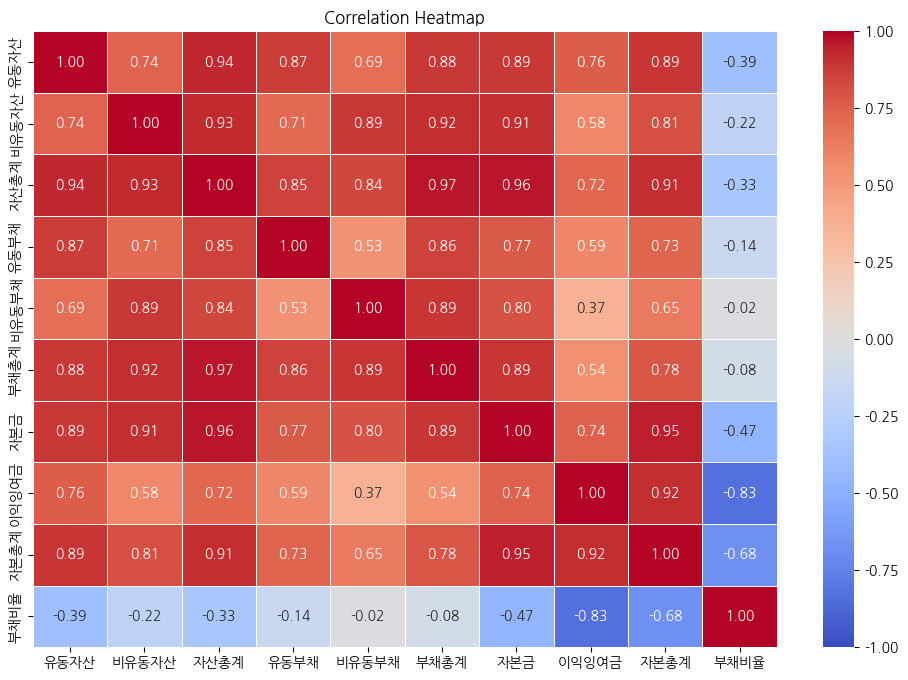

In [ ]:
# 데이터프레임을 전치하여 행을 열로 변환
df_transposed = data.T

# 상관관계 계산
corr_matrix = df_transposed.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

상관관계 반영해 선형회귀 분석

In [ ]:
# 부채비율과 상관관계가 절대값 0.3 이상인 변수들 선택
threshold_debt = 0.3
target_corr_debt = corr_matrix['부채비율'].abs()  # 절대값으로 상관관계 계산
relevant_features_debt = target_corr_debt[target_corr_debt >= threshold_debt].index.tolist()

# 부채비율을 제외한 나머지 변수들
relevant_features_debt.remove('부채비율')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 입력 변수(X)와 목표 변수(y) 설정
X_debt = data.drop('부채비율', axis=0).T
y_debt = data.loc['부채비율']

X_train_debt, X_test_debt, y_train_debt, y_test_debt = train_test_split(X_debt, y_debt, test_size=0.2, random_state=42, shuffle=False)

X_train_debt = X_train_debt.apply(pd.to_numeric, errors='coerce')
X_test_debt = X_test_debt.apply(pd.to_numeric, errors='coerce')

# 선형 회귀 모델 훈련
model_debt = LinearRegression()
model_debt.fit(X_train_debt, y_train_debt)

# 테스트 데이터로 예측
y_pred_debt = model_debt.predict(X_test_debt)

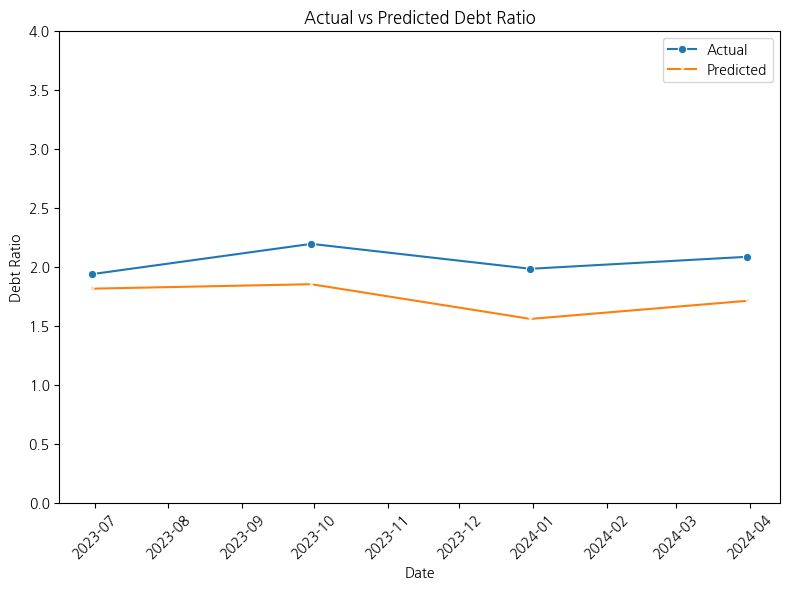

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 예측값과 실제값을 포함한 데이터프레임 생성
results_df = pd.DataFrame({
    'Date': X_test_debt.index,
    'Actual': y_test_debt,
    'Predicted': y_pred_debt
})

plt.figure(figsize=(8, 6))

# 실제값과 예측값 시각화
sns.lineplot(data=results_df, x='Date', y='Actual', label='Actual', marker='o')
sns.lineplot(data=results_df, x='Date', y='Predicted', label='Predicted', marker='x')

# y축 범위 설정
plt.ylim(0, 4)

# 그래프 제목 및 레이블 설정
plt.title('Actual vs Predicted Debt Ratio')
plt.xlabel('Date')
plt.ylabel('Debt Ratio')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

이익잉여금 예측

In [ ]:
# 이익잉여금과 상관관계가 절대값 0.6 이상인 변수들 선택
threshold = 0.6
target_corr = corr_matrix['이익잉여금'].abs()
relevant_features = target_corr[target_corr >= threshold].index.tolist()

relevant_features.remove('이익잉여금')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data.drop('이익잉여금', axis=0).T
y = data.loc['이익잉여금']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

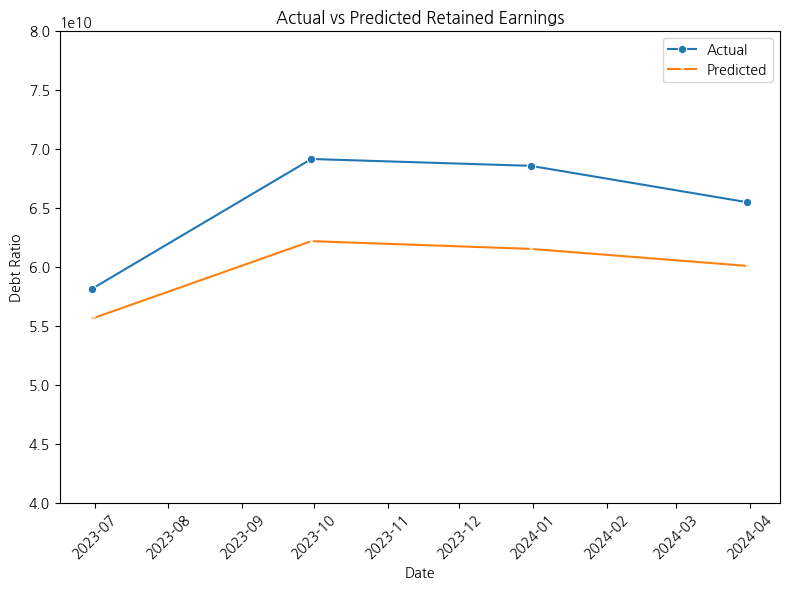

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 예측값과 실제값을 포함한 데이터프레임 생성
results_df = pd.DataFrame({
    'Date': X_test.index,
    'Actual': y_test,
    'Predicted': y_pred
})

plt.figure(figsize=(8, 6))


sns.lineplot(data=results_df, x='Date', y='Actual', label='Actual', marker='o')
sns.lineplot(data=results_df, x='Date', y='Predicted', label='Predicted', marker='x')


# y축 범위 설정
plt.ylim(4e10, 8e10)

plt.title('Actual vs Predicted Retained Earnings')
plt.xlabel('Date')
plt.ylabel('Debt Ratio')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

현재 데이터로 미래 값 예측하기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

# 데이터 준비
X = data.drop('이익잉여금', axis=0).T
y = data.loc['이익잉여금']

# 데이터 타입 확인 및 변환
print(f"Original data type: {y.dtype}")

# 데이터가 object 타입이면 숫자형으로 변환
if y.dtype == 'object':
    y = pd.to_numeric(y, errors='coerce')

# NaN 값이 있는지 확인하고 처리
y = y.dropna()

# 인덱스가 날짜형인지 확인하고 변환
if not isinstance(y.index, pd.DatetimeIndex):
    y.index = pd.to_datetime(y.index)

# Train/Test 분할 (90%/10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=False)

Original data type: object


ARIMA / SARIMA 사용

In [ ]:
# SARIMA 모델 훈련 (훈련 데이터 사용)
try:
    model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit(disp=False)
except Exception as e:
    print(f"Error: {e}")

# ARIMA 모델 사용시 주석 해제 후 활용
# model = ARIMA(y, order=(5, 1, 0))  # (p, d, q) 파라미터는 데이터를 분석하여 최적화할 수 있습니다.
# model_fit = model.fit()

# 테스트 데이터에 대한 예측 수행
forecast = model_fit.predict(start=y_test.index[0], end=y_test.index[-1])

# 예측값과 실제값을 포함한 데이터프레임 생성
results_df = pd.DataFrame({
    'Date': y_test.index,
    'Actual': y_test,
    'Predicted': forecast
})

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


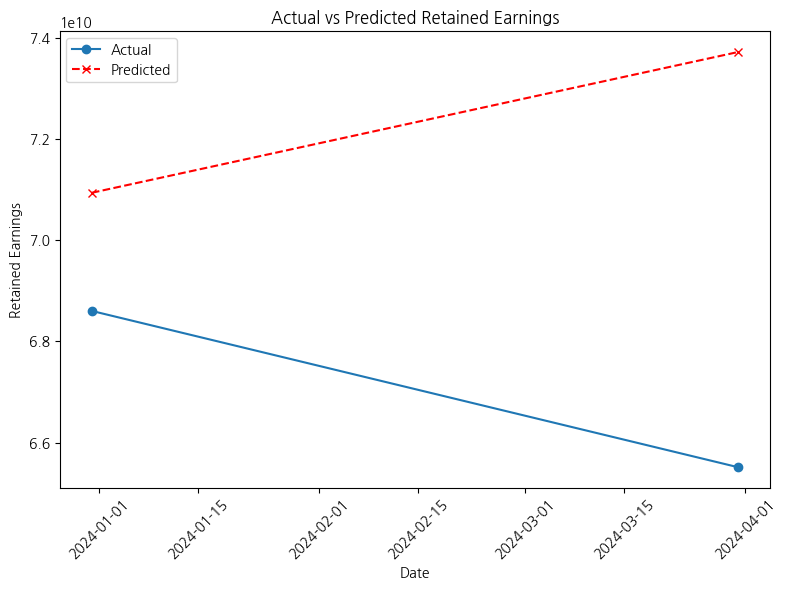

In [ ]:
# 시각화
plt.figure(figsize=(8, 6))

# 실제값 시각화
plt.plot(results_df['Date'], results_df['Actual'], label='Actual', marker='o')

# 예측값 시각화
plt.plot(results_df['Date'], results_df['Predicted'], label='Predicted', marker='x', linestyle='--', color='red')

plt.title('Actual vs Predicted Retained Earnings')
plt.xlabel('Date')
plt.ylabel('Retained Earnings')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
!pip install pmdarima

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

y = data.loc['이익잉여금']

# auto_arima를 사용해 최적의 (p, d, q) 값 찾기
stepwise_model = auto_arima(y, start_p=1, start_q=1,
                            max_p=5, max_q=5, seasonal=False,
                            d=None, trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

# 최적의 (p, d, q) 값 출력
print(stepwise_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=768.719, Time=1.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=769.275, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=765.196, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=765.954, Time=0.92 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=767.783, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=763.215, Time=1.16 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=765.450, Time=1.64 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=765.178, Time=2.33 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=767.109, Time=3.19 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=766.987, Time=0.26 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 11.480 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   17
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


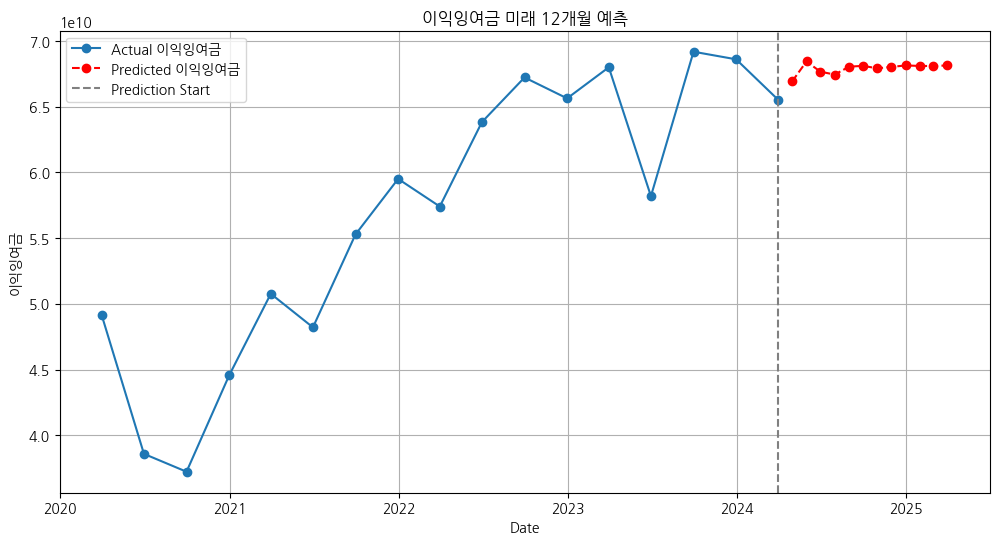

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

y = data.loc['이익잉여금']

model = ARIMA(y, order=(5, 1, 0))
model_fit = model.fit()

# 미래 12개월 예측
forecast = model_fit.forecast(steps=12)

# 예측된 값의 인덱스 생성
future_index = pd.date_range(start=y.index[-1], periods=13, freq='M')[1:]

# 시각화를 위해 실제 값과 예측 값 결합
y_all = pd.concat([y, pd.Series(forecast, index=future_index)], axis=0)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(y.index, y, label='Actual 이익잉여금', marker='o')
plt.plot(future_index, forecast, label='Predicted 이익잉여금', marker='o', linestyle='--', color='red')
plt.axvline(x=y.index[-1], color='gray', linestyle='--', label='Prediction Start')
plt.title('이익잉여금 미래 12개월 예측')
plt.xlabel('Date')
plt.ylabel('이익잉여금')
plt.legend()
plt.grid(True)
plt.show()

Original data type: object
NaN values: 0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


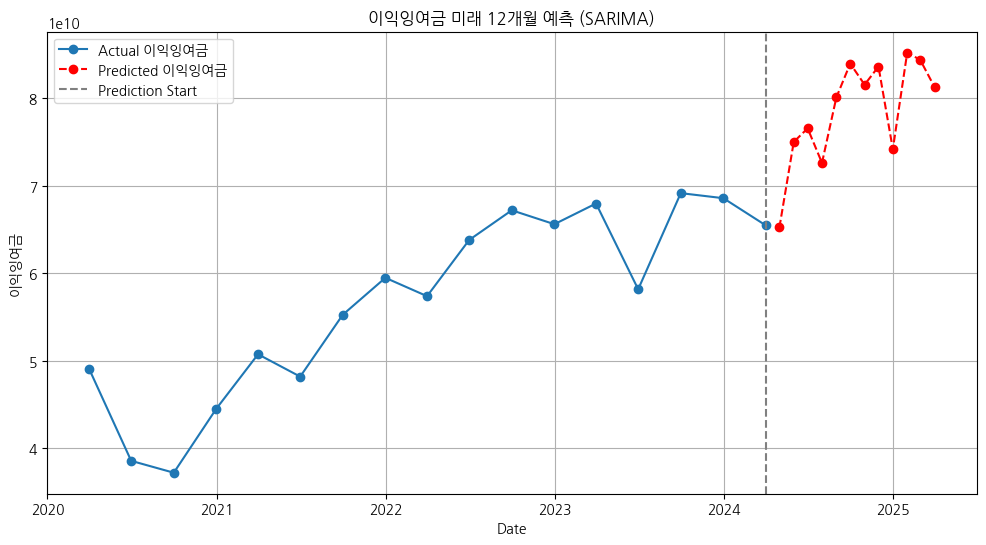

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

y = data.loc['이익잉여금']

# 데이터가 object 타입이면 숫자형으로 변환
if y.dtype == 'object':
    y = pd.to_numeric(y, errors='coerce')

# NaN 값이 있는지 확인하고 처리
y = y.dropna()

# 인덱스가 날짜형인지 확인
if not isinstance(y.index, pd.DatetimeIndex):
    y.index = pd.to_datetime(y.index)


model = SARIMAX(y, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

forecast = model_fit.forecast(steps=12)

future_index = pd.date_range(start=y.index[-1], periods=13, freq='M')[1:]

y_all = pd.concat([y, pd.Series(forecast, index=future_index)], axis=0)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(y.index, y, label='Actual 이익잉여금', marker='o')
plt.plot(future_index, forecast, label='Predicted 이익잉여금', marker='o', linestyle='--', color='red')
plt.axvline(x=y.index[-1], color='gray', linestyle='--', label='Prediction Start')
plt.title('이익잉여금 미래 12개월 예측 (SARIMA)')
plt.xlabel('Date')
plt.ylabel('이익잉여금')
plt.legend()
plt.grid(True)
plt.show()

미래의 x값도 예측하여, 그 값들로 미래의 y값 예측하기

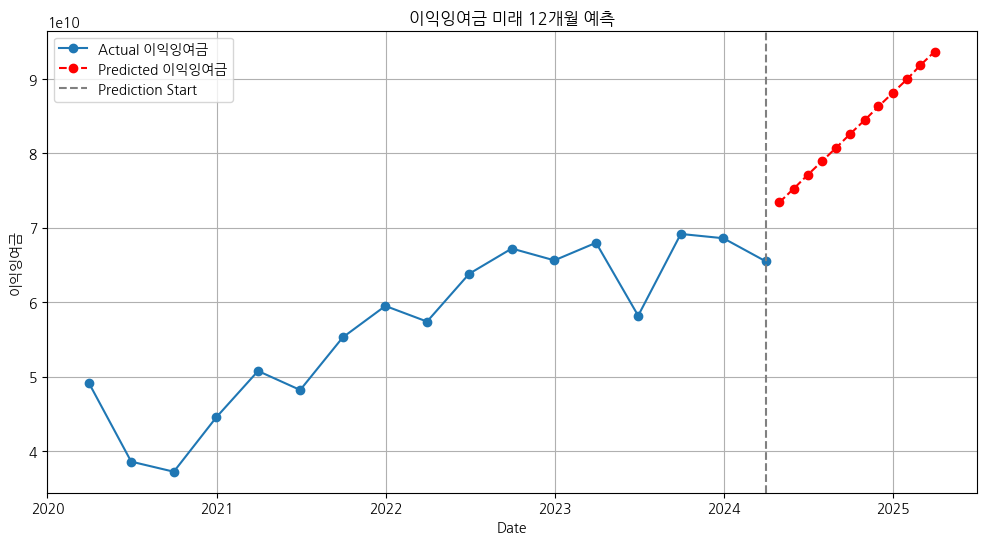

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 데이터 준비
y = data.loc['이익잉여금']
x = np.arange(len(y)).reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)

# 미래 12개월 x값 준비
future_dates = pd.date_range(start=y.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
future_x = np.arange(len(y), len(y) + 12).reshape(-1, 1)  # 예측을 위한 future x값 생성

# 미래 y값 예측
forecast = model.predict(future_x)

forecast_series = pd.Series(forecast, index=future_dates)
y_all = pd.concat([y, forecast_series], axis=0)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(y.index, y, label='Actual 이익잉여금', marker='o')
plt.plot(future_dates, forecast, label='Predicted 이익잉여금', marker='o', linestyle='--', color='red')
plt.axvline(x=y.index[-1], color='gray', linestyle='--', label='Prediction Start')
plt.title('이익잉여금 미래 12개월 예측')
plt.xlabel('Date')
plt.ylabel('이익잉여금')
plt.legend()
plt.grid(True)
plt.show()